# Testing ESS Maximum Likelihood Toolkit (EMTK) 

## Lorentzian Curve / Cauchy Distribution

Generated 2000 samples using parameters [0.01111111]
Adding flat background of 200.0 points
Lorentzian curve maximum likelihood estimation
2200 data points
[0.0001] as initial guess (kappa)
[0.01259459] solution obtained numerically
That a maximum was found is True via second derivative


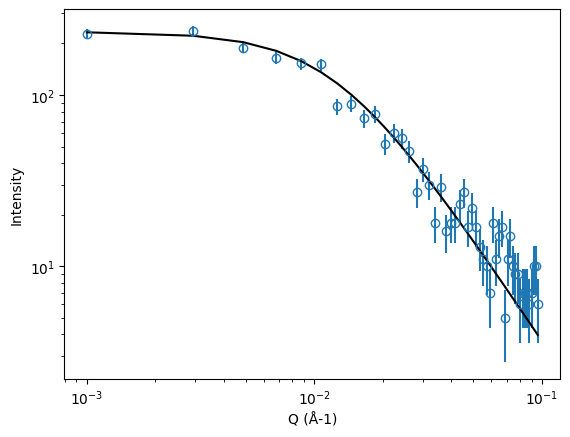

In [83]:
import emtk
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

reload(emtk)

clength = 90.0 # correlation length in system

kappa = 1.0 / clength
curv = emtk.lorentzianCurve()
pvalues = np.array([kappa])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.generatebackground(xrange, ratio=0.1) # method is resistant to a 10% background, which is pretty big
curv.mle()
#curv.report()
#curv.mleAnalytic()
curv.report()
curv.plotFit(logarithmic=True)
#a2 = curv.adtest()
#print("Anderson Darling test statistic:", a2)
#ks = curv.kstest()
#print("Kolmogorov Smirnov test statistic:", ks)


In [12]:
reload(emtk)
curv = emtk.lorentzianCurve()
pars =  np.array([1.0/90.0])
qt = curv.Quantile(pars, 0.6)
nqt= curv.nQuantile(pars, 0.6)
print("qt :", qt)
print("nqt:", nqt)



qt : 0.0036102188470322916
nqt: [0.00361022]


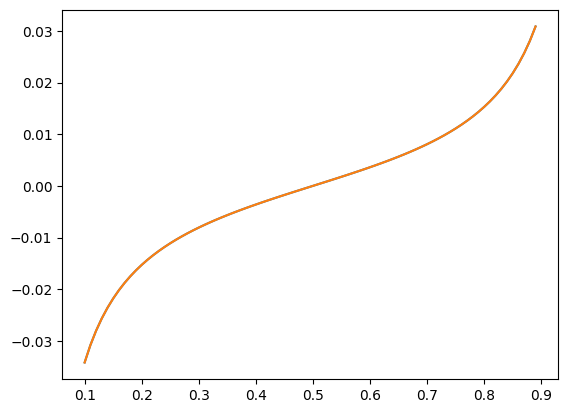

In [13]:
xs = np.arange(0.1, 0.9, 0.01)
ys = curv.Quantile(pars, xs)
nys= curv.nQuantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)
ax.plot(xs, nys)

In [14]:
curv.Quantile(pars, 0.8)

0.015293132449679708

In [15]:
curv.nQuantile(pars, 0.8)

array([0.01529313])

In [16]:
curv.CDF(pars, curv.Quantile(pars, 0.4))

0.4

In [17]:
curv.CDF(pars, curv.nQuantile(pars, 0.4))

array([0.4])

# Lorentzian-Squared

Generated 2000 samples using parameters [0.01111111 0.1       ]


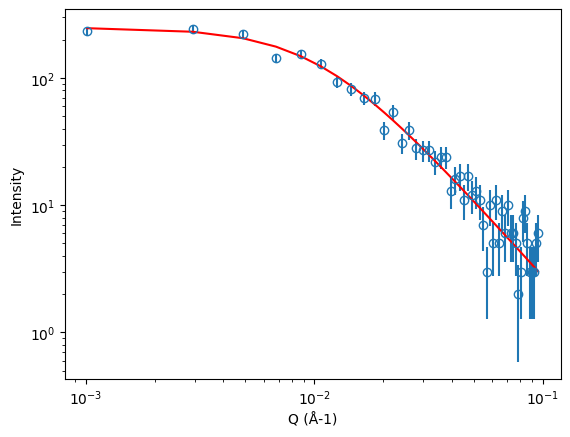

In [84]:
# At present, this is NOT working correctly and needs more development
# It is not clear why this curve shape does not work.
# Suspicion: that the Aharony-Pytte function needs to be replaced
# with an alternative disordered system model.

reload(emtk)
curv = emtk.lorentzianSquaredCurve()
kappa = 1.0 / 90.0
ss = 0.1
pvalues = np.array([kappa, ss])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 2000)
curv.guesses = pvalues
#curv.mle()
#curv.report()
curv.plotFit(logarithmic=True)

Lorentzian Squared maximum likelihood estimation
2000 data points
[0.01111111 0.1       ] as initial guesses (kappa, S)
[2.76786632e-02 5.30369795e+03] solution obtained numerically
R = 36.12891248766871
That a maximum was found is True via second derivative


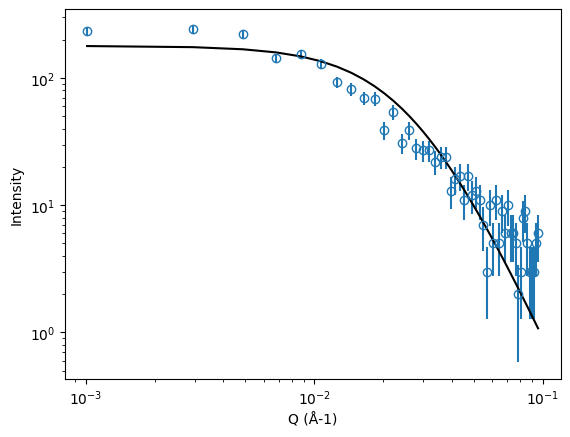

In [85]:
curv.mle()
curv.report()
curv.plotFit()

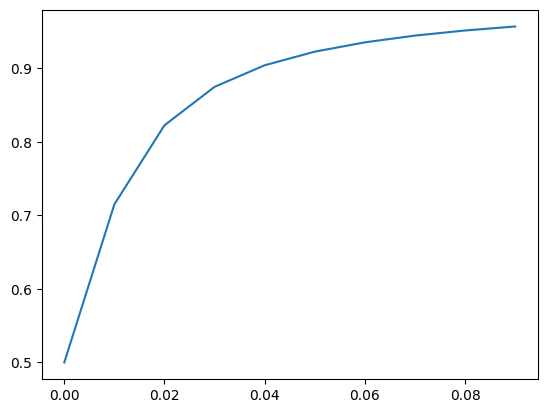

In [26]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.0, 0.1, 0.01)
ys = curv.CDF(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

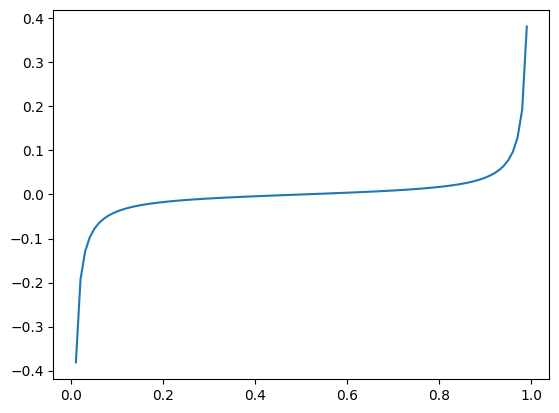

In [20]:
pars =  np.array([1.0/80.0, 0.1])
xs = np.arange(0.01, 1.0, 0.01)
ys = curv.Quantile(pars, xs)
fx,ax = plt.subplots()
ax.plot(xs, ys)

## Hard Spheres

Generated 3988 samples using parameters [75.]


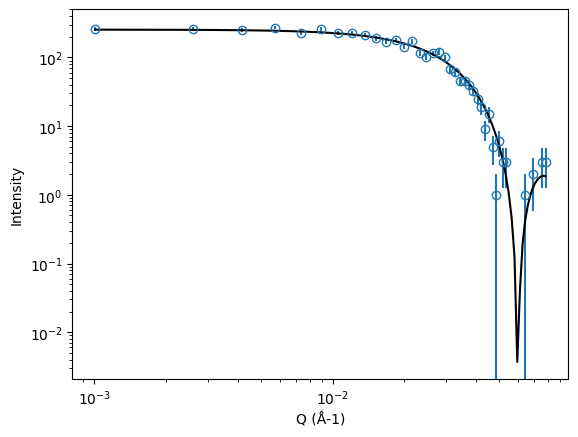

In [90]:
reload(emtk)
curv = emtk.hardSphereCurve()
pvalues = np.array([75.0])
xrange = np.array([0.001, 0.1])
curv.generateTestSamples(pvalues, xrange, 4000)
curv.guesses = pvalues
curv.mle()
#curv.report()
curv.plotFit(logarithmic=True)

Adding flat background of 398.8 points
Hard sphere model maximum likelihood estimation
4386 data points
[75.] as initial guesses (R, Angstroms)
[74.39475733] solution obtained numerically
The second derivative indicates that this is a maximum


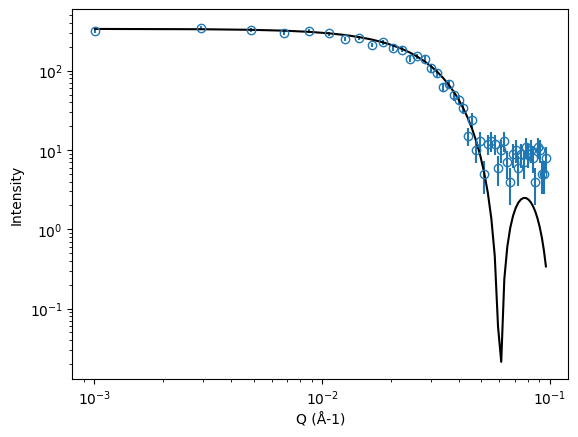

In [91]:
# It is quite tolerant of backgrounds here as well
curv.generatebackground(xrange, ratio=0.1)
curv.mle()
curv.report()
curv.plotFit(logarithmic=True)

In [ ]:
pytest?
testing?
sphinx? - like doxygen

# open data catalogues
data.ill.eu - similar catalogue at ISIS
data.panasc.eu

